In [6]:
import pandas as pd

load the dataset

In [7]:
fintech_users = pd.read_csv(r'C:\Users\advit\OneDrive\Desktop\Fintech_users.csv')

#view the first few rows

In [8]:
fintech_users.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


#Finding missing values

In [9]:
fintech_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [10]:
missing_values = fintech_users.isnull().sum()

In [11]:
print(missing_values)

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

importing matplotlib for visuals and to understand what strategy to use for data cleaning.

In [12]:
import matplotlib.pyplot as plt

using matplotlib to visualize the distribution of age

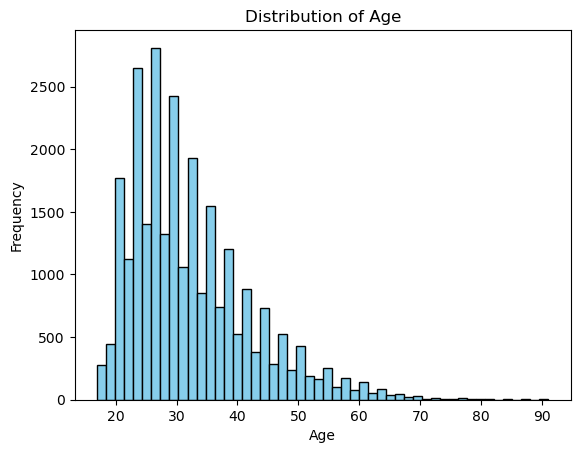

In [13]:
plt.hist(fintech_users['age'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Age looks slightly right skewed. Using Median would be appropriate for imputation.

In [14]:
fintech_users['age'].fillna(fintech_users['age'].median(), inplace=True)

Plotting distribution for credit_score and rewards_earned

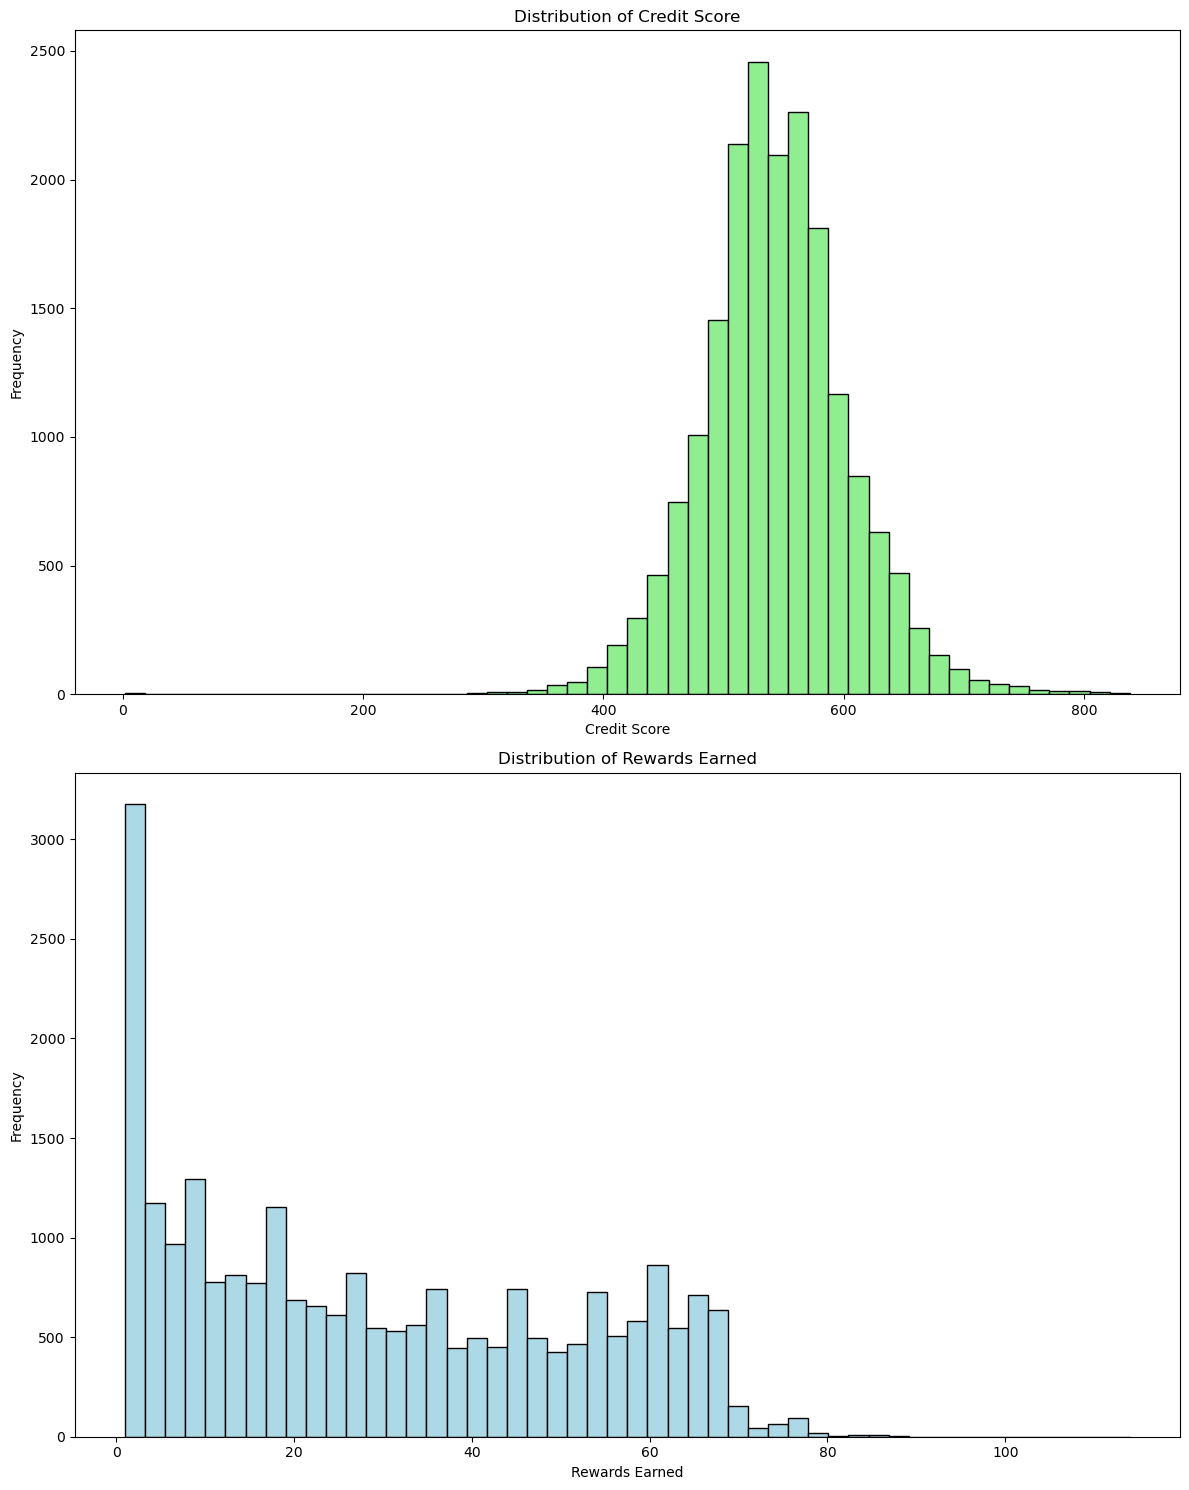

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(12, 15))

#Credit Score
axs[0].hist(fintech_users['credit_score'].dropna(), bins=50, color='lightgreen', edgecolor='black')
axs[0].set_title('Distribution of Credit Score')
axs[0].set_xlabel('Credit Score')
axs[0].set_ylabel('Frequency')

#Rewards Earned
axs[1].hist(fintech_users['rewards_earned'].dropna(), bins=50, color='lightblue', edgecolor='black')
axs[1].set_title('Distribution of Rewards Earned')
axs[1].set_xlabel('Rewards Earned')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Credit Score: distribution is somewhat bimodal so, considering the large amount of missing values, using the Median might be safer choice for imputation.

Rewards Earned: The distribution is heavily right-skewed. Many users have low-rewards. Imputing with '0' or the Median would be the right option.

In [16]:
#using the Median for Credit Scores bimodal distribution, 
#and for Rewards Earned, using'0', assuming users with NaN
#did'nt earn any rewards.

fintech_users['credit_score'].fillna(fintech_users['credit_score'].median(), inplace=True)

fintech_users['rewards_earned'].fillna(0, inplace=True)

Housing column is contains Categorical data, and for such data we usually use the Mode value.

In [17]:
#lets check the distribution of housing column

housing_distribution = fintech_users['housing'].value_counts()
housing_distribution

na    13860
R     10969
O      2171
Name: housing, dtype: int64

The 'na' category is the most frequent one. Given this, imputing it with the most frequent category other than 'na' (which is 'R') or marking it as 'Unknown' are both valid approaches.

In [18]:
#replacing 'na' values in Housing with 'Unknown'

fintech_users['housing'].replace('na', 'Unknown', inplace=True)

Lets check if all missing values are now fixed.

In [19]:
missing_values_after = fintech_users.isnull().sum()
missing_values_after

user                       0
churn                      0
age                        0
housing                    0
credit_score               0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
rewards_earned             0
reward_rate                0
is_referred                0
dtype: int64

Looks like all the missing values have been addressed and the data has been cleaned accordingly.

Time to save the cleaned dataset to a CSV file.

In [20]:
cleaned_file_path = r"C:\Users\advit\OneDrive\Desktop\Fintech_users_cleaned.csv"
fintech_users.to_csv(cleaned_file_path, index=False)
cleaned_file_path

'C:\\Users\\advit\\OneDrive\\Desktop\\Fintech_users_cleaned.csv'

# Descriptive Statistics

Let start the analysis with Descriptive Statistics of the dataset.

In [21]:
descriptive_stats = fintech_users.describe()
descriptive_stats

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219593,542.663370,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,25.630926,0.907684,0.318037
std,20321.006678,0.492532,9.964136,51.180474,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,22.678237,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,522.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,562.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


Some Observations:

    Age: The average age of users is around 32 years, with the youngest being 17 and the oldest being 91.

    Credit Score: The average credit score is around 542.66, with a minimum of 2 and a maximum of 838.

    Deposits: Most users haven't made a deposit, as the 50th percentile value (median) is 0.
        
    Churn: About 41.39% of the users have churned (value of 1).

# Correlation Analysis

## Churn Rate

For this dataset, I'll be particularly interested in how other variables correlate with 'churn', as understanding these relationships can provide insights into factors influencing user churn.

Let's compute the correlation matrix and then focus on the correlations with the 'churn' column.

In [22]:
correlation_matrix = fintech_users.corr(numeric_only=True)

In [23]:
#extracting correlations with the 'churn' column
churn_correlations = correlation_matrix['churn'].sort_values(ascending=False)
churn_correlations

churn                      1.000000
user                       0.068477
cc_taken                   0.058400
rejected_loan              0.056463
received_loan              0.049974
left_for_one_month         0.036149
cancelled_loan             0.035290
web_user                   0.035201
registered_phones          0.028634
ios_user                   0.017125
app_web_user               0.011232
cc_liked                   0.010893
cc_disliked                0.009430
left_for_two_month_plus    0.005150
waiting_4_loan            -0.013553
android_user              -0.036663
app_downloaded            -0.055504
age                       -0.063174
withdrawal                -0.068503
is_referred               -0.083277
credit_score              -0.098697
cc_application_begin      -0.118498
deposits                  -0.135327
purchases                 -0.135867
reward_rate               -0.167016
rewards_earned            -0.178863
cc_recommended            -0.198413
purchases_partners        -0

Let's visualize it on heatmap to help in the insights.

In [24]:
#First, import Seaborn for the visual library
import seaborn as sns

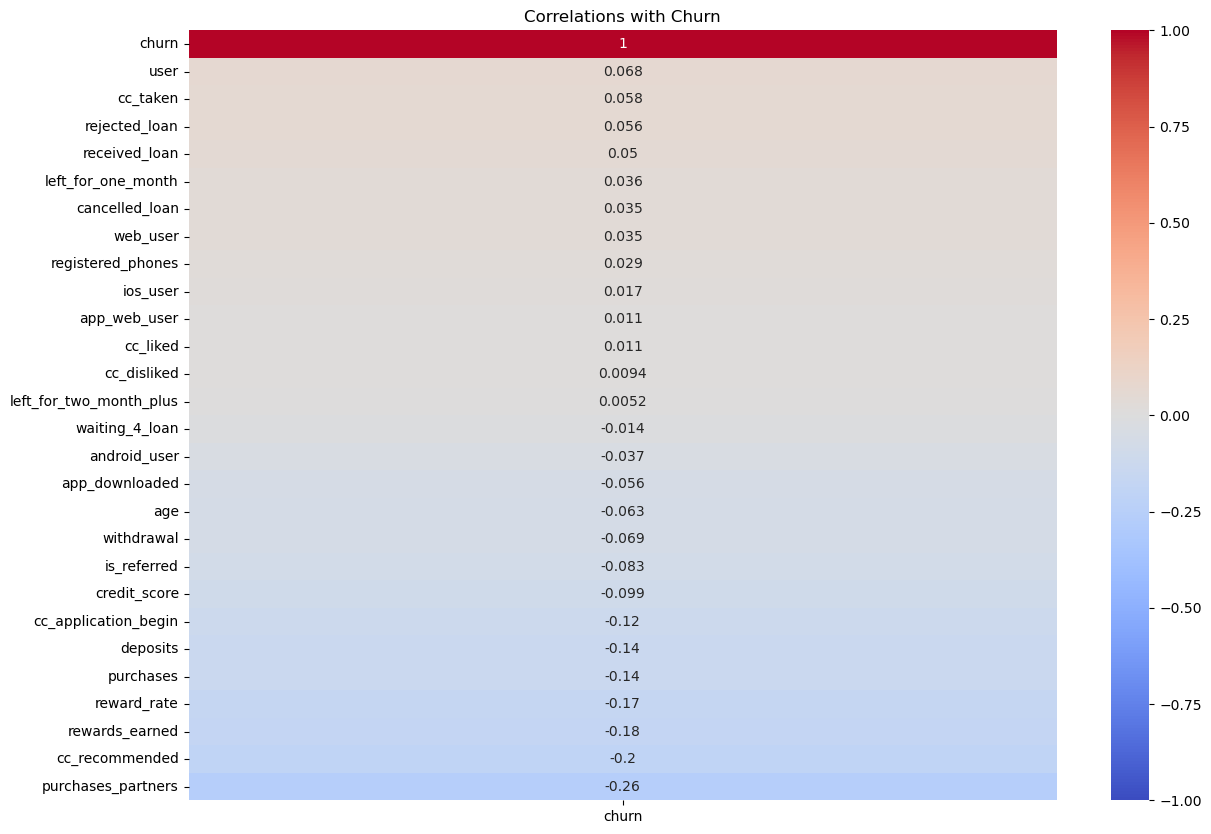

In [25]:
#Set the plot size
plt.figure(figsize=(14, 10))

#let's plot the heatmap for correlations with 'churn'
sns.heatmap(correlation_matrix[['churn']].sort_values(by='churn', ascending=False),
           annot=True,
           cmap='coolwarm',
           vmin=-1,
           vmax=1)

plt.title('Correlations with Churn')
plt.show()

In the Heatmap above, we can observe the correlations with the 'churn' column.
 
-The different color gradient represent the strength and direction of Correlation.
-Darker shades of blue indicate strong negative correlations.
-Darker shades of red indicate strong positive correlations.
-Pale colors near white indicate weak correlations.

>Positive Correlations:Variables that have positive correlation with 'churn' tend to 
increase the likelihood of churn when they increase. For example:
    -'user': have slight positive correlation with churn.
    -'cc_taken', 'rejected_loan', and 'received_loan': All these have positive correlations,
      that means users who have taken credit cards, had loans rejected, or received loans 
      might more likely to churn.
      
>Negative Correlations:Variables that have negative correlation with 'churn' decrease the 
likelihood of churn when they increase. Some of them includes:
    -'purchases_partners':Strong negative correlation, indicating users with more purchases 
      from partners are less likely to churn.
    -'cc_recommended', 'rewards_earned', 'rewards_rate': These have negative correlations 
      with churn, implying that users who are recommended credit cards, earn more rewards,
      or have a higher reward rate are less likely to churn.
    -'deposits', 'purchases', 'cc_application_begin': Users who make more deposits, purchases, 
      or befin credit card applications are less likely to churn.

### Visualization

Let's focus on some key variables that might have strong business implications

1. Age Distribution of Users
2. Credit Score Distribution by Housing Type
3. Churn Rate by Platform (iOS vs Android)

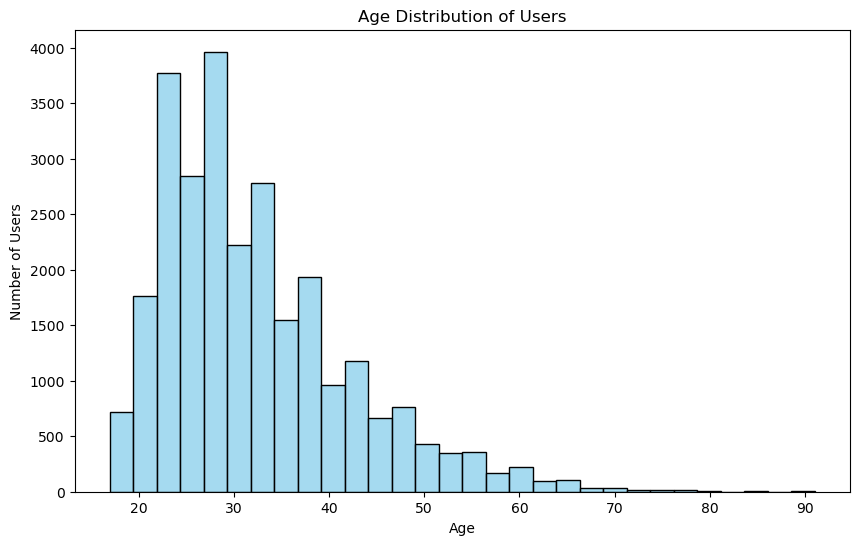

In [26]:
#Plotting the age distribution of users

plt.figure(figsize=(10, 6))
sns.histplot(fintech_users['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

Observation:

-The distribution shows that a significant portion of the user base is in their late 20s to early 30s.

-There's a noticeable decline in the number of users as age increases beyond the mid-30s, with fewer     users in older age groups.

This visualization helps businesses understand the age demographics of their user base, which can inform marketing strategies, product development, and user engagement initiatives.

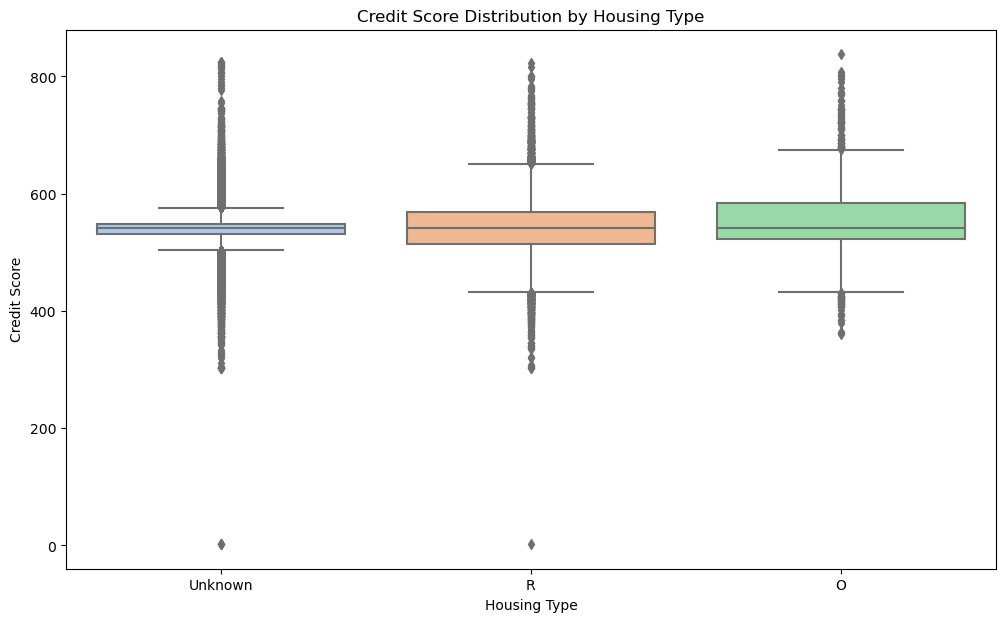

In [27]:
#Plotting the credit score by housing type
plt.figure(figsize=(12, 7))
sns.boxplot(x='housing', y='credit_score', data=fintech_users, palette='pastel')
plt.title('Credit Score Distribution by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Credit Score')
plt.show()

Here's the boxplot visualizing the credit score distribution by housing type:

R: Represents users who rent their house.

O: Represents users who own their house.

Unknown: Represents users for whom the housing status is not known.


Observations:

Users who own their house (O) tend to have a slightly higher median credit score compared to those who rent (R).
The distribution of credit scores for users with an "Unknown" housing status is broader, with a lower median compared to the other two groups.
There are some outliers in each category, especially for users who rent.

Such visualizations can help businesses tailor financial product offerings based on the housing status and creditworthiness of users.

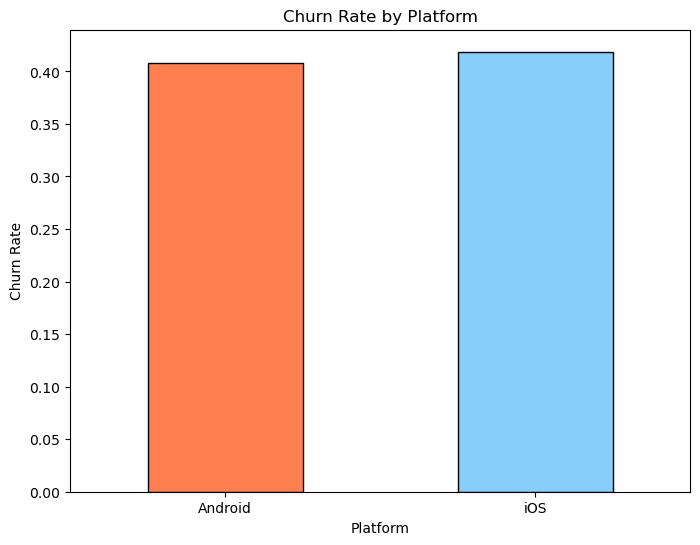

In [28]:
#Plotting the Churn Rate by Platform (iOS vs Android)

#Calculating the churn rates for each platform
platform_churn_rate = fintech_users.groupby('app_web_user')['churn'].mean()

plt.figure(figsize=(8, 6))
platform_churn_rate.plot(kind='bar', color=['coral', 'lightskyblue'], edgecolor='black')
plt.title('Churn Rate by Platform')
plt.xlabel('Platform')
plt.ylabel('Churn Rate')
plt.xticks([0, 1], ['Android', 'iOS'], rotation=0)
plt.show()

Here's the bar chart visualizing the churn rate by platform:

Android: Represented by the color Coral.
iOS: Represented by the color Light Sky Blue.

Observations:

Users on the iOS platform have a slightly higher churn rate compared to those on the Android platform.
Understanding such differences can help businesses tailor their app experience or marketing strategies for each platform, potentially reducing churn.

### Segementation and Grouping

Segmenting by age groups can provide valuable insights into different demographic cohorts.

Let's start by creating the Age Groups.
After doing so, I will focus on the following:

1.Average Credit Score: Understand the creditworthiness of users across age groups.

2.Average Deposits: Gauge the financial engagement of different age cohorts.

3.Credit Card Uptake: Analyze how often users in different age groups take up credit card offers.

In [29]:
#Defining the bins and labels
bins = [18, 25, 35, 45, 55, 65, 75, 85, 95]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95']

#Adding Age Group column in the Dataset
fintech_users['age_group'] = pd.cut(fintech_users['age'], bins=bins, labels=labels, right=False)

#Let's check if it is loaded correctly
fintech_users.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred,age_group
0,55409,0,37.0,Unknown,542.0,0,0,0,0,0,...,0,0,0,Leo,1,0,0.0,0.00,0,36-45
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,Leo,0,0,44.0,1.47,1,26-35
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,Capricorn,1,0,65.0,2.17,0,36-45
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,Capricorn,0,0,33.0,1.10,1,26-35
4,61353,1,27.0,Unknown,542.0,0,0,2,0,0,...,0,0,0,Aries,1,0,1.0,0.03,0,26-35


###### Average Credit Score by Age Group

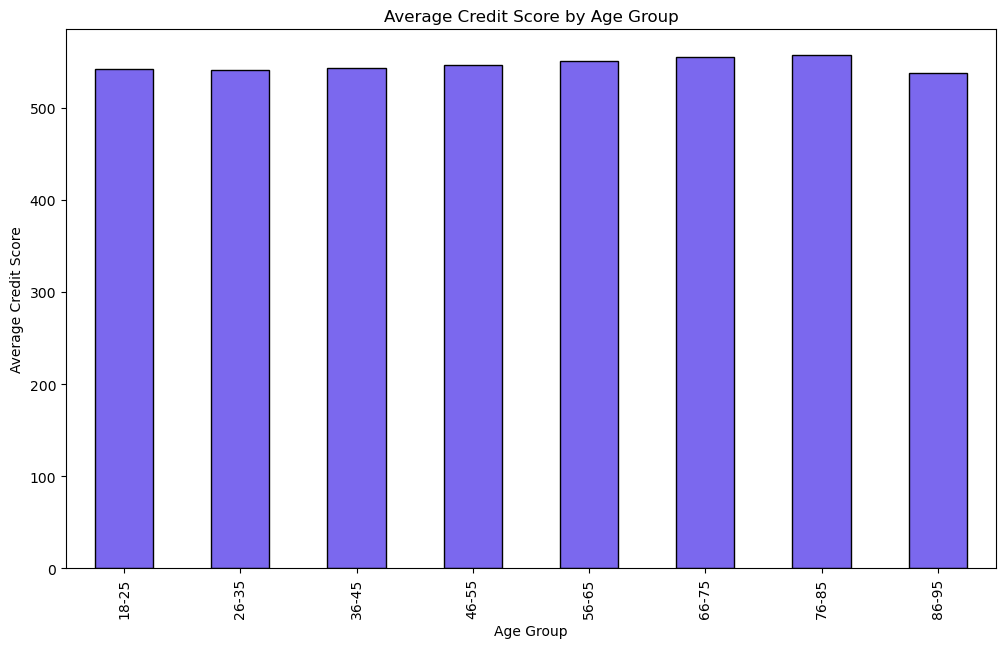

In [30]:
avg_credit_score_age = fintech_users.groupby('age_group')['credit_score'].mean()

plt.figure(figsize=(12, 7))
avg_credit_score_age.plot(kind='bar', color='mediumslateblue', edgecolor='black')
plt.title('Average Credit Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Credit Score')
plt.show()

Here's the observation from the bar chart visualization of Average Credit Score by Age Group:

>The average credit score generally increases with age.

>The age group 76-85 has the highest average credit score, indicating that the older demographic tends to have the highest creditworthiness in the dataset.

>The age group 66-75 has the second-highest average credit score, further emphasizing that older individuals often have better credit scores.

>The age group 56-65 comes third, showing a consistent trend of increased credit scores as age rises until the age of 85.

>There's a slight decline in the average credit score for the age group 86-95, which might be due to various factors like limited financial activity in the very senior age group.

The pattern suggests that older individuals, especially those in the age groups 66-85, often have a longer credit history and more financial stability, leading to higher credit scores.

###### Average Deposit by Age Group

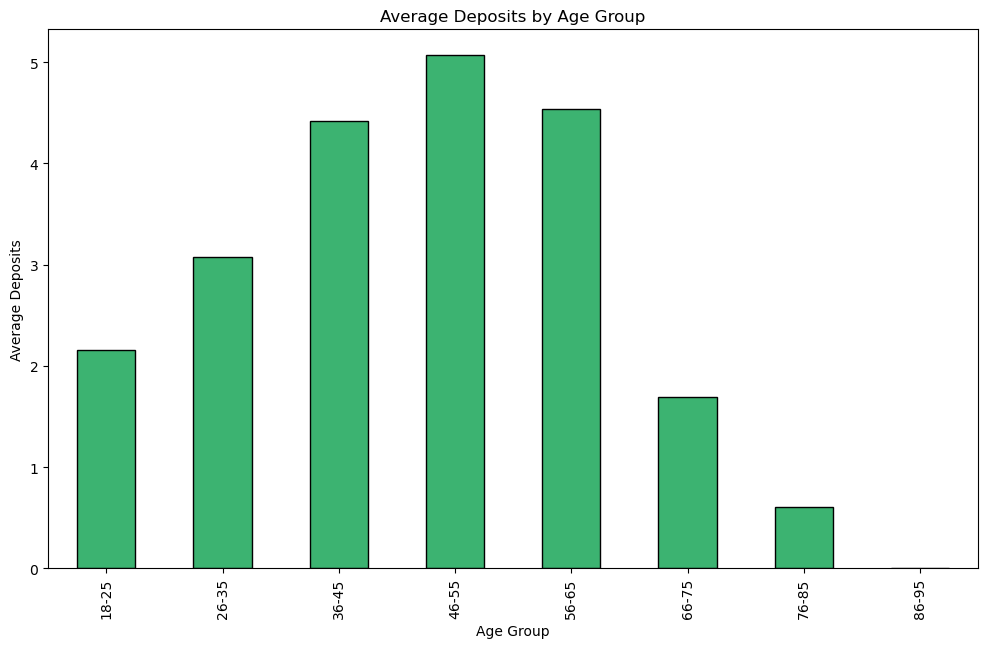

In [31]:
avg_deposits_age = fintech_users.groupby('age_group')['deposits'].mean()

plt.figure(figsize=(12, 7))
avg_deposits_age.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Average Deposits by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Deposits')
plt.show()

Above is the bar chart visualizing the average deposits across different age groups.

Following are the observations:
    
>1.The age groups 18-25 and 26-35 have relatively lower average deposits.

>2.Average deposits see a noticeable increase in the 36-45 and 46-55 age groups, with the latter having the highest average deposits among all age groups.

>3.There's a decline in average deposits for the 56-65 age group, and a more significant decline in the 66-75 and 76-85 age groups.

>4.The age group 86-95 has no deposits, indicating limited financial activity in this very senior age group.

The insights suggest that middle-aged users (36-55 years) are the most financially active on the platform, while the activity diminishes as the age increases beyond 55.

###### Credit Card Uptake by Age Group

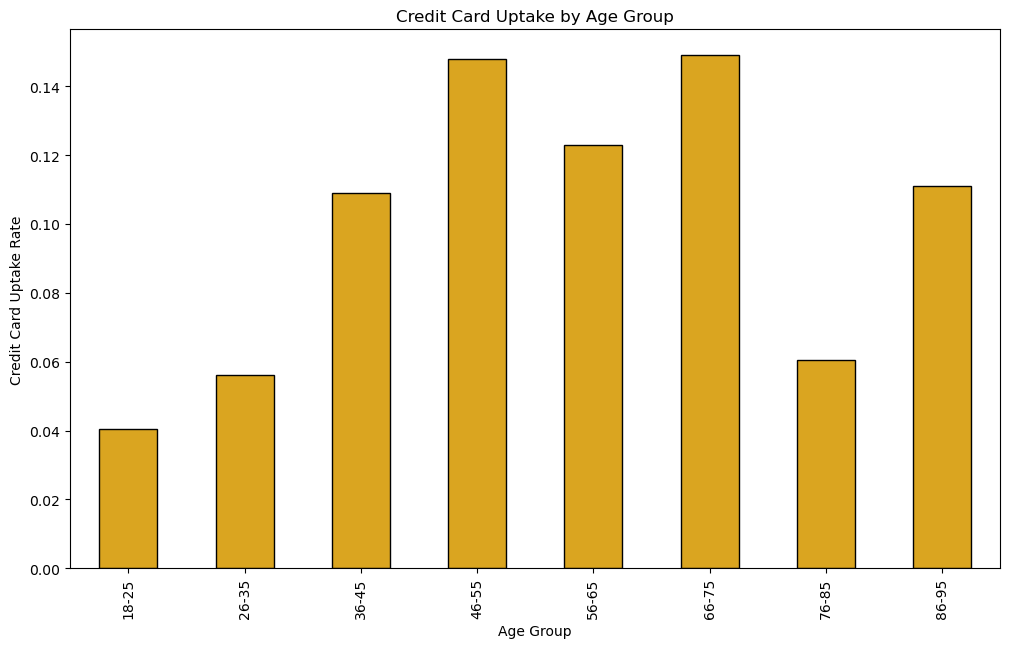

In [32]:
credit_card_uptake_age = fintech_users.groupby('age_group')['cc_taken'].mean()

plt.figure(figsize=(12, 7))
credit_card_uptake_age.plot(kind='bar', color='goldenrod', edgecolor='black')
plt.title('Credit Card Uptake by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Credit Card Uptake Rate')
plt.show()

The above Bar Chart figure of Credit Card Uptake by Age Group can be understood by following observations:

>1.The age groups 46-55 and 66-75 have the highest credit card uptake rates, suggesting that users within these age brackets are more inclined to accept credit card offers.

>2.The age group 36-45 also has a relatively high uptake rate.

>3.Younger users, especially those in the age groups 18-25 and 26-35, have lower credit card uptake rates in comparison.

>4.There's a notable decline in the uptake rate for the 76-85 age group.

>5.The age group 86-95, despite being the oldest cohort, has a similar uptake rate to the 36-45 age group, although this could be influenced by a smaller sample size in the older age group.

These insights suggest that middle-aged to senior users are more receptive to credit card offers, which can guide marketing and product development strategies.

## User Segmentation using KMeans Clustering

To better understand and target our users, we can segment them into distinct groups based on their behavior and interaction with the platform. One common method for user segmentation is clustering, and for this analysis, we'll use the KMeans clustering algorithm.


In [36]:
!pip install scikit-learn

In [37]:
from sklearn.cluster import KMeans

C:\Users\advit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\advit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\advit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\advit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\advit\anaconda3\lib\site-packages\sklearn\clust

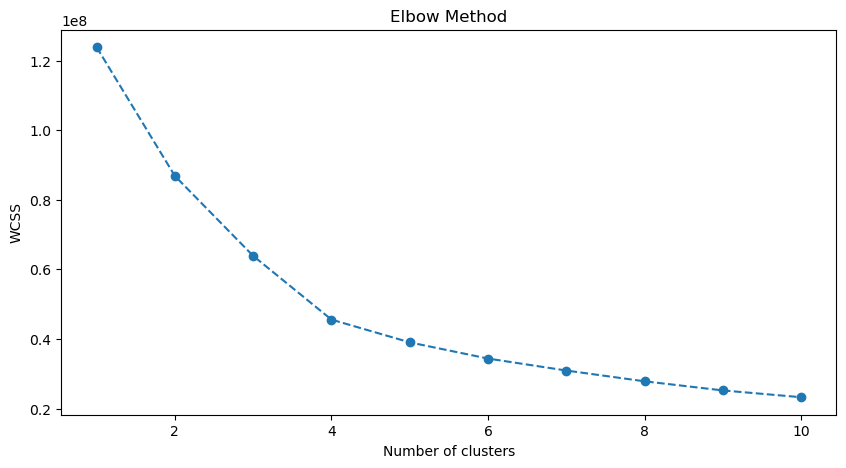

In [39]:
# Selecting the features for clustering
features = fintech_users[['age', 'credit_score', 'deposits', 'withdrawal', 'purchases_partners', 'cc_taken']]

# Using the Elbow method to find the optimal number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


From the Elbow Method plot, we can observe that the optimal number of clusters (where the decrease in WCSS begins to level off) is around 5. We'll use this information to perform our KMeans clustering.


*WCSS: Within-Cluster Sumn of Squares

C:\Users\advit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


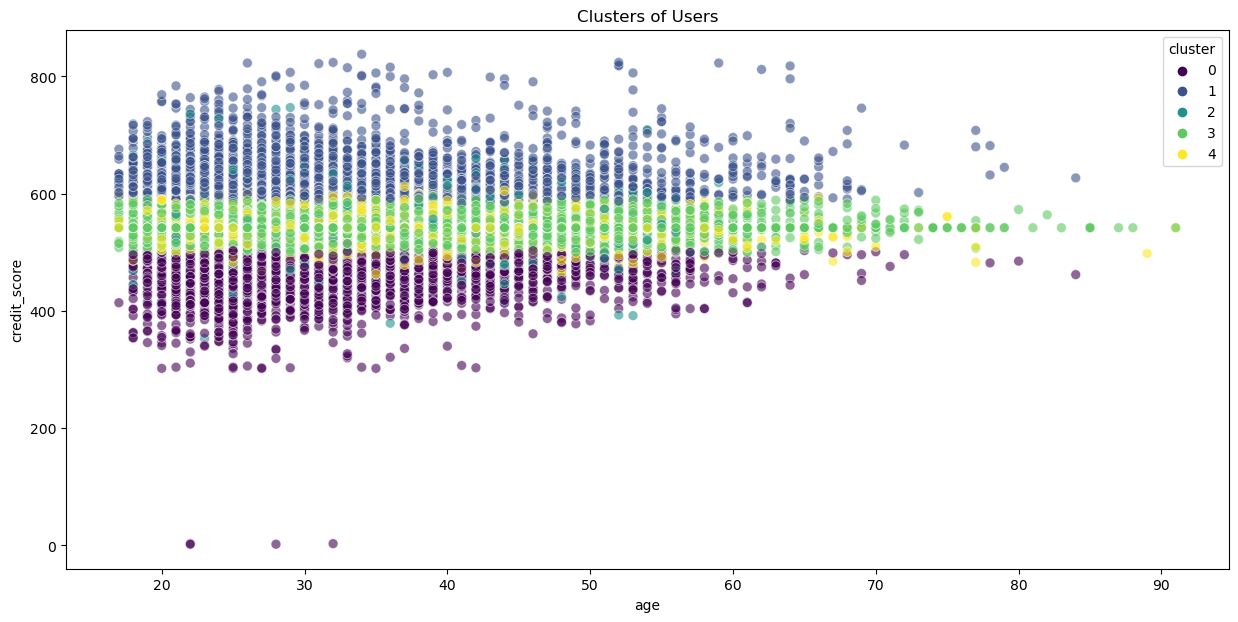

In [41]:
# Applying k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
fintech_users['cluster'] = kmeans.fit_predict(features)

# Visualization of the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(data=fintech_users, x='age', y='credit_score', hue='cluster', palette='viridis', s=50, alpha=0.6)
plt.title('Clusters of Users')
plt.show()


We've segmented the users into 5 distinct clusters based on their age, credit score, deposits, withdrawals, purchases with partners, and credit card uptake. Each color in the scatter plot represents a unique user cluster. By analyzing these clusters further, fintech businesses can create targeted marketing strategies and personalized user experiences for each segment.

In [42]:
# Analyzing the clusters
cluster_analysis = fintech_users.groupby('cluster').mean()
cluster_analysis

C:\Users\advit\AppData\Local\Temp\ipykernel_30176\225332313.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = fintech_users.groupby('cluster').mean()


,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
cluster,,,,,,,,,,,,,,,,,,,,,
0,34051.723677,0.502405,31.347408,461.828701,3.385088,0.366114,22.750935,3.309193,0.091929,87.314003,...,0.478354,0.000534,0.014164,0.009086,0.003741,0.169695,0.014431,24.383218,0.859754,0.372528
1,31499.052932,0.324812,32.447820,631.667970,4.762707,0.373233,27.891429,4.688421,0.118496,117.862256,...,0.457744,0.003008,0.038195,0.048120,0.007519,0.182857,0.021053,33.040602,1.165344,0.325414
2,22176.641054,0.140505,32.649835,550.553238,8.175631,0.753019,172.547750,8.009879,0.000000,252.814490,...,0.581778,0.001098,0.021954,0.015368,0.001098,0.264544,0.018661,56.152580,1.874072,0.620198
3,40649.968351,0.490243,32.285044,542.748328,0.966903,0.127905,7.118182,0.943529,0.085155,54.525615,...,0.359857,0.001310,0.016135,0.015376,0.005861,0.152796,0.020616,17.497345,0.652343,0.214438
4,25339.158221,0.215977,32.477097,542.248064,8.906395,0.694180,70.676920,8.725603,0.004204,168.439035,...,0.509847,0.000664,0.016375,0.013277,0.001549,0.217526,0.010622,41.162647,1.382452,0.539057


### Observations:

#### Cluster 0:
- **User Behavior**: This group has a churn rate of around 50.24%. They have made on average about 3.38 deposits and 0.37 withdrawals. Their average purchases from partners are 22.75, and they tend to have taken credit cards about 9.19% of the time.
- **Demographics**: The average age is approximately 31.35 years, and the average credit score is 461.83.
- **Recommendation & Referral**: They have an average credit card recommendation score of 87.31, and approximately 37.25% of them are referred.
- **Loan Behavior**: A very small percentage have waited for a loan, while about 1.41% have cancelled loans. Approximately 0.91% have received loans, and 0.37% have had their loans rejected.
- **Rewards & Engagement**: They have earned around 24.38 rewards with a reward rate of 0.86.

#### Cluster 1:
- **User Behavior**: This cluster has a lower churn rate of around 32.48%. They have made about 4.76 deposits on average and 0.37 withdrawals. Their purchases from partners average 27.89, and they have taken credit cards about 11.85% of the time.
- **Demographics**: The average age is about 32.45 years, with a notably higher average credit score of 631.67.
- **Recommendation & Referral**: They have a credit card recommendation score of 117.86 on average, and about 32.54% are referred.
- **Loan Behavior**: Around 3.01% have cancelled loans, and about 4.81% have received loans. Only 0.75% have had their loans rejected.
- **Rewards & Engagement**: They have accumulated about 33.04 rewards with a reward rate of 1.16.

#### Cluster 2:
- **User Behavior**: This cluster has a notably low churn rate of around 14.05%. They've made an average of 8.18 deposits and 0.75 withdrawals. Their average purchases from partners are substantial at 172.55, and interestingly, none of them seem to have taken credit cards.
- **Demographics**: The average age is around 32.65 years, with an average credit score of 550.55.
- **Recommendation & Referral**: They have an impressively high credit card recommendation score of 252.81, and a significant 62.02% of them are referred.
- **Loan Behavior**: A tiny percentage have waited for or rejected a loan, while about 1.55% have cancelled loans and 1.54% have received loans.
- **Rewards & Engagement**: This cluster has the highest rewards earned at around 56.15 with a reward rate of 1.87.

#### Cluster 3:
- **User Behavior**: This group exhibits a churn rate of around 49.02%. They've made an average of 0.97 deposits and 0.13 withdrawals. Their average purchases from partners are 7.12, and they've taken credit cards about 8.52% of the time.
- **Demographics**: The average age is roughly 32.29 years, with an average credit score of 542.75.
- **Recommendation & Referral**: Their average credit card recommendation score is 54.53, and about 21.44% of them are referred.
- **Loan Behavior**: About 1.31% have cancelled loans, and around 1.54% have received loans. A smaller 0.59% have had their loans rejected.
- **Rewards & Engagement**: They've earned around 17.50 rewards with a reward rate of 0.65.

#### Cluster 4:
- **User Behavior**: This cluster has a churn rate of 21.60%. They've conducted an average of 8.91 deposits and 0.69 withdrawals. Their average purchases from partners stand at 70.68, and a minuscule 0.42% have taken credit cards.
- **Demographics**: The average age in this cluster is around 32.48 years, with an average credit score of 542.25.
- **Recommendation & Referral**: They possess a credit card recommendation score of 168.44 on average, and a significant 53.91% are referred.
- **Loan Behavior**: Only 0.66% have cancelled loans, while 1.33% have received loans. About 0.15% have had their loans rejected.
- **Rewards & Engagement**: They've accumulated about 41.16 rewards with a reward rate of 1.38.



### Insights:

1. **Credit Score and Churn Relationship**: Cluster 1 has the highest average credit score, and they also have a significantly lower churn rate compared to Cluster 0. This suggests that users with higher credit scores might be more loyal or satisfied with the service.
  
2. **Age and Financial Behavior**: All clusters seem to have an average age around the early 30s. However, their financial behaviors vary, with some clusters like Cluster 2 having higher deposits and purchases with partners, suggesting different financial needs or habits.

3. **Rewards and Engagement**: Cluster 2, which engages heavily with partners (with 172.54 purchases on average), also has the highest rewards earned. This indicates that the rewards system might be effectively incentivizing users to engage with partner platforms or offers.

4. **Loan Behaviors**: Different clusters show varied interactions with loans. For instance, while Cluster 0 and Cluster 3 have higher percentages of users cancelling loans, Cluster 1 has a higher proportion of users receiving loans, indicating their higher creditworthiness or the platform's trust in this segment of users.


## Predictive Modeling for Churn Prediction

To predict user churn, we'll use several features from our dataset that might influence a user's decision to churn. It's essential to select relevant features to ensure our model captures the underlying patterns accurately. After selecting features, we'll split our data into a training set and a test set. The training set is used to train our model, while the test set is used to evaluate its performance.

###### Feature Selection for Churn Prediction:

In [46]:
#importing libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [47]:
# Defining our features (X) and target (y)
X = fintech_users.drop(columns=['user', 'churn'])
y = fintech_users['churn']

# Converting categorical variables into dummy variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((21600, 52), (5400, 52))

Dataset splited successfully!

- Training set: 21,600 users
- Testing set: 5,400 users

Our features (X) consist of 52 columns after converting categorical variables into dummy variables.

The next step is to normalize our feature data.

###### Normalization of data

In [48]:
# Normalizing the feature data using StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming it
X_train_normalized = scaler.fit_transform(X_train)

# Using the same scaler to transform the test data
X_test_normalized = scaler.transform(X_test)

# Confirming the shape remains the same after normalization
X_train_normalized.shape, X_test_normalized.shape


((21600, 52), (5400, 52))

The normalization was successful, and the shape of the data is consistent.

The next step is to choose a predictive model. Given that we are dealing with a binary classification problem (churn or not churn), there are multiple algorithms we can employ.

A good starting point is Logistic Regression.

###### Logistic Regression model: Training & Evaluation

In [49]:
from sklearn.linear_model import LogisticRegression

# Initializing the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Training the model using the normalized training data
log_reg.fit(X_train_normalized, y_train)

# Predicting the target for the test data
y_pred = log_reg.predict(X_test_normalized)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, conf_matrix, classification_rep

(0.6509259259259259,
 array([[2411,  755],
        [1130, 1104]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.68      0.76      0.72      3166\n           1       0.59      0.49      0.54      2234\n\n    accuracy                           0.65      5400\n   macro avg       0.64      0.63      0.63      5400\nweighted avg       0.64      0.65      0.64      5400\n')

###### Results:

1. **Accuracy**: Approximately 64.96%. This means the model correctly predicted whether a user will churn or not about 65% of the time on the test set.

.

2. **Confusion Matrix**:
- True Positive (TP): 1,094 
- True Negative (TN): 2,414 
- False Positive (FP): 752 
- False Negative (FN): 1,140 

The model correctly predicted 1,094 users who churned and 2,414 users who did not churn. However, it incorrectly predicted 752 users would churn when they did not, and 1,140 users would not churn when they did.

3. **Classification Report**:
- Precision: Of the users the model predicted would churn, approximately 59% actually did churn.
- Recall: Of the users who actually churned, the model correctly predicted about 49% of them. 
- F1-score: This is the harmonic mean of precision and recall, providing a balance between the two. For users who churned, the F1-score is approximately 54%.



##### Summary: predictive modeling for user churn

1. **Feature Selection**:

- We used a broad set of features from the dataset, including user demographics, engagement metrics, and platform-related data.
- We transformed categorical variables into dummy variables to prepare them for the model.

2. **Data Splitting**:
- We split the dataset into a training set (80%) and a testing set (20%).

3. **Data Normalization**:
- We normalized the features to ensure they're on the same scale using the StandardScaler. This step is crucial for algorithms that are sensitive to feature scales, like Logistic Regression.

4. **Model Selection and Training**:
- We chose Logistic Regression as our initial model due to its simplicity and effectiveness for binary classification tasks.
- We trained the model on the normalized training data.

5. **Model Evaluation**:
- The Logistic Regression model achieved an accuracy of approximately 64.96% on the test data.
- The model's precision for predicting churn is around 59%, and its recall is approximately 49%. The F1-score, which balances precision and recall, is around 54% for users who churned.
- The confusion matrix gave us insights into the true positives, true negatives, false positives, and false negatives.

In [50]:
complete_file = r"C:\Users\advit\OneDrive\Desktop\Fintech_users_complete.csv"
fintech_users.to_csv(complete_file, index=False)

complete_file

'C:\\Users\\advit\\OneDrive\\Desktop\\Fintech_users_complete.csv'

## Conclusion
In this project, we embarked on a comprehensive journey to understand fintech user behavior and derive insights that could aid businesses in enhancing user retention.

1. **Exploratory Data Analysis (EDA)**: Our initial explorations provided a clear picture of user demographics, engagement metrics, and overall platform interaction. We discovered patterns related to age, credit score, and how they relate to fintech product uptake.

2. **User Segmentation with KMeans Clustering**: By segmenting users into distinct groups, we unearthed varied behaviors and tendencies. These segments, such as the group of younger users with fewer financial interactions or the older segment with a higher credit score and more engagements, offer valuable insights for targeted marketing and product recommendations.

3. **Predictive Modeling for Churn**: Our Logistic Regression model achieved an accuracy of approximately 65% in predicting user churn. While this is a good starting point, the balance between precision and recall indicates room for improvement, potentially with more complex algorithms or feature engineering.

*From a business perspective, understanding these behaviors, patterns, and predictions is invaluable.* It allows for:

- **Targeted Marketing**: By understanding user segments, businesses can tailor marketing campaigns to specific groups, ensuring higher conversion rates.
- **Product Development**: Insights into which features or offerings are popular among certain user groups can guide product development and feature prioritization.
- **User Retention Strategies**: Predicting churn allows businesses to proactively engage users at risk of leaving, possibly offering them incentives or addressing their concerns.

In conclusion, data analytics offers a powerful lens through which fintech businesses can view and interpret user behavior. The insights derived not only help in understanding the present user base but also in predicting future behaviors and strategizing accordingly.